# Multiple Linear Regression

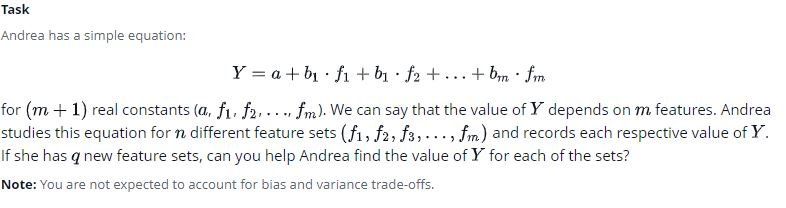

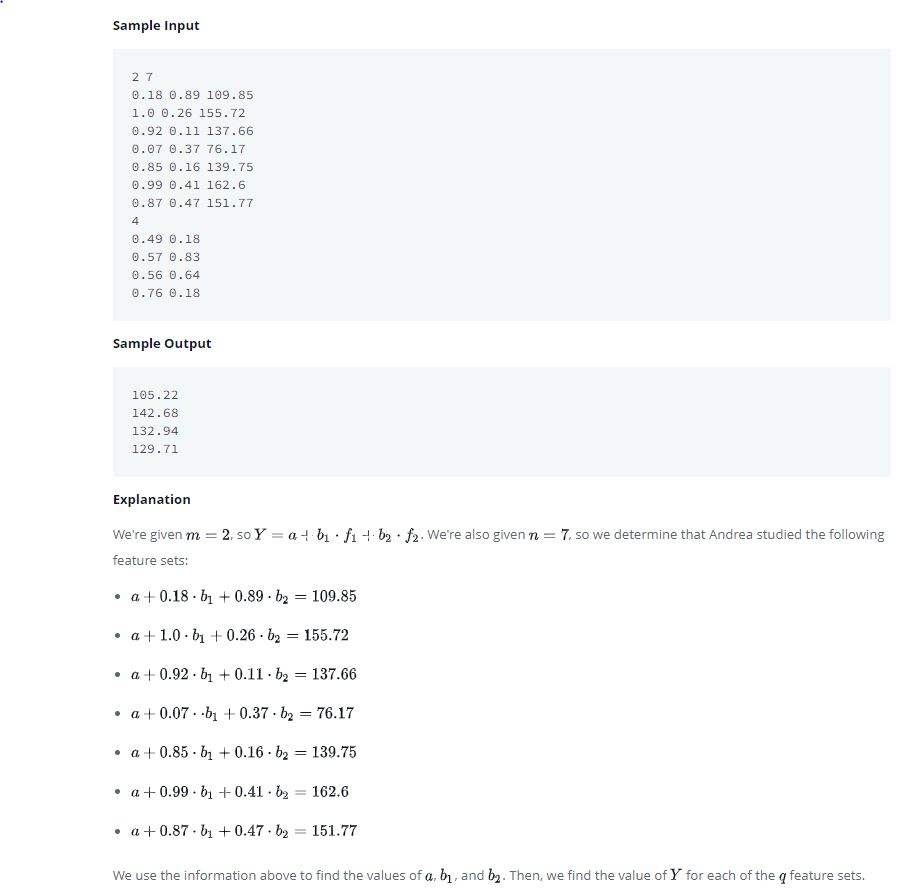

In [2]:
from copy import deepcopy

def transpose(x):
    x_dash = []
    for col in range(len(x[0])):
        x_dash.append([x_row[col] for x_row in x])
    return x_dash

def determinant(x):
    if len(x) == 2:
        return x[0][0] * x[1][1] - x[0][1] * x[1][0]
  
    sign = 1
    answer    = []
    for col in range(len(x[0])):
        new_matrix = []
        for row in x[1:]:
            n_row = row.copy()
            n_row.pop(col)
            new_matrix.append(n_row)
        answer.append(sign * x[0][col] * determinant(new_matrix))
        sign *= -1
    return sum(answer)

def matrix_inverse(x):
    answer = [[0 for _ in range(len(x[0]))] for _ in range(len(x))]

  # matrix of minors
    for row in range(len(x)):
        for col in range(len(x[0])):
            new_matrix = deepcopy(x)
            new_matrix.pop(row)
            for n_row in range(len(new_matrix)):
                new_matrix[n_row].pop(col)
            answer[row][col] = determinant(new_matrix)
       
  # matrix of cofactor
    for row in range(len(answer)):
        for col in range(len(answer[0])):
            answer[row][col] *= (-1) ** (row + col)
      
  # adjoint matrix
    answer = transpose(answer)

  # final inverse
    inv_det = 1 / determinant(x)
    for row in range(len(answer)):
        for col in range(len(answer[0])):
            answer[row][col] *= inv_det

    return answer
  

def matrix_mult(A, B):
    row_a = len(A)
    col_b = len(B[0])
    new_mat = [[0 for _ in range(col_b)] for _ in range(row_a)]
    m_sum   = 0  
    for row_a in range(len(A)):
        for col_b in range(len(B[0])):
            m_sum = 0
            for k in range(len(A[0])):
                m_sum += A[row_a][k] * B[k][col_b]
            new_mat[row_a][col_b] = m_sum
    return new_mat


def solve(y, x, x_pred):
    x_dash  = transpose(x)
    X = matrix_mult(x_dash, x)
    X_inv   = matrix_inverse(X)
    X_final = matrix_mult(X_inv, x_dash)
    # reshape 1D y into 2d matrix
    y = [[yi] for yi in y]
    B = matrix_mult(X_final, y)
    y_pred  = matrix_mult(x_pred,B)
    # reshape 2d y_pred matrix into 1d matrix
    y_output  = []
    for yi in y_pred:
        y_output.append(*yi)
    return y_output

def main():
    m, n = map(int, input().strip().split())
    x = []; y = []; x_pred = []
    for _ in range(n):
        *features, y_val = map(float, input().strip().split())
        x.append([1] + features)
        y.append(y_val)

    for _ in range(int(input())):
        features = list(map(float, input().strip().split()))
        x_pred.append([1] + features)
  
    answer = solve(y, x, x_pred)
    for num in answer:
        print(round(num, 2))

if __name__ == "__main__":
    main()

2 7
0.18 0.89 109.85
1.0 0.26 155.72
0.92 0.11 137.66
0.07 0.37 76.17
0.85 0.16 139.75
0.99 0.41 162.6
0.87 0.47 151.77
4
0.49 0.18
0.57 0.83
0.56 0.64
0.76 0.18
105.21
142.67
132.94
129.7


In [1]:
import numpy as np

def solve(y, x, x_pred):
    # x transpose
    x_dash  = x.T
    # product of x_dash and x
    X = x_dash.dot(x)
    # inverse of X
    X_inv   = np.linalg.inv(X)
    # producet of X_inv and x_dash
    X_final = X_inv.dot(x_dash)
    # product of X_final and y i.e B
    B = X_final.dot(y)
    # calculate the y_pred
    y_pred  = x_pred.dot(B)
    return y_pred

def main():
    m, n = map(int, input().strip().split())
    y = []; x = []; x_pred = []
    for _ in range(n):
        *features, y_val = map(float, input().strip().split())
        x.append([1] + features)
        y.append(y_val)

    for _ in range(int(input())):
        features = list(map(float, input().strip().split()))
        x_pred.append([1] + features)

    y = np.array(y)
    x = np.array(x)
    x_pred = np.array(x_pred)
    answer = solve(y, x, x_pred)
  
    for num in answer:
        print(round(num, 2))

if __name__ == "__main__":
    main()

2 7
0.18 0.89 109.85
1.0 0.26 155.72
0.92 0.11 137.66
0.07 0.37 76.17
0.85 0.16 139.75
0.99 0.41 162.6
0.87 0.47 151.77
4
0.49 0.18
0.57 0.83
0.56 0.64
0.76 0.18
105.21
142.67
132.94
129.7


In [ ]:

def solve(y, x, x_pred):
    lm = linear_model.LinearRegression()
    lm.fit(x, y)
    y_pred = lm.predict(x_pred)
    return y_pred

def main():
    m, n = map(int, input().strip().split())
    y = []; x = []; x_pred = []
    for _ in range(n):
        *features, y_val = map(float, input().strip().split())
        x.append(features)
        y.append(y_val)

    for _ in range(int(input())):
        features = list(map(float, input().strip().split()))
        x_pred.append(features)
  
    answer = solve(y, x, x_pred)
    for num in answer:
        print(round(num, 2))

if __name__ == "__main__":
    main()

In [ ]:
# # IN R 
# library(dplyr)

# f <- file("stdin")
# on.exit(close(f))

# # Get data from input (the hardest part!)
# T <- readLines(f) %>%
#     strsplit(" ") %>%
#     lapply(as.numeric)
# m <- T[[1]][1]; n <- T[[1]][2]
# train <- T[2:(2+n-1)]
# train <- data.frame(t(data.frame(train)))
# q <- T[[2+n]][1]
# test <- T[(2+n+1):(2+n+q)]
# test <- data.frame(t(data.frame(test)))

# # Do the modelling 
# formula <- as.formula(paste(tail(names(train), 1), "~ ."))
# model <- lm(formula, train)
# predict(model,test) %>%
#   round(2) %>%
#   format(nsmall = 2) %>%
#write(stdout())